# **Flood Prediction in Lagos**

## **Background and Context**

This datasets are originally from the Weather Data Service and other known sources.

### Goals

Develop a system for predicting the likelihood of flood occurrences in Lagos, Nigeria and gain insights into the relationships between weather variables and historical flood events

#### Objectives

- Collect and pre-process historical weather data (precipitation, temperature, humidity, wind speed, etc.) for Lagos from 2004 to 2024.
- Gather historical flood occurrence data for the same period from various sources (social media, research papers, news articles, government websites).
- Analyze and visualize the data to understand weather patterns and flood frequency.
- Address the class imbalance in the flood occurrence data (very few flood events compared to non-flood events) through oversampling techniques.
- Train and evaluate different machine learning models (Logistic Regression, Random Forest, XGBoost, and Stacking Classifier) for flood prediction.
- Select the best performing model based on its ability to predict flood occurrences.
- Utilize the chosen model to predict the likelihood of future flood events based on forecasted weather conditions.

<b>Data Dictionary</b>:

- Datetime.<br>

# Import Necessary Libraries

In [2]:
# Importing essential libraries for data handling and analysis
import pandas as pd  # Data manipulation and analysis
import numpy as np   # Numerical operations
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay


# Suppress warnings for cleaner notebook presentation
import warnings
warnings.filterwarnings('ignore')

#Set option to display all columns
pd.set_option('display.max_columns', None)

### **Step 1: Exploratory Data Analysis (EDA) and Preprocessing**

- Load the dataset, handle missing values, and perform EDA.<br>

In [17]:
# Load dataset
data = pd.read_excel('Lagos_weather_data_final - Copy.xlsx')
data.head(2)

,name,Datetime,tempmax,tempmin,Temperature,feelslikemax,feelslikemin,feelslike,dew,Humidity,Precipitation,Precipitation_Probability,Precipation_Cover,Rain_Occurence,Wind_Gust,Wind_Speed,Wind_Direction,Sea_Level_Pressure,Cloud_Cover,Visibility,solarradiation,solarenergy,uvindex,severerisk,sunrise,sunset,Moon_Phase,Conditions,Flood_Occurrence,Description,icon,stations,windspeedmax,windspeedmin
0,Lagos,2004-05-13,31.7,28.2,30.0,38.9,32.6,35.8,24.9,74.7,0.0,0.0,0.0,NaN,NaN,20.5,128.2,NaN,90.0,11.0,NaN,NaN,NaN,NaN,2004-05-13T06:30:34,2004-05-13T18:55:02,0.80,Partially cloudy,NaN,Becoming cloudy in the afternoon.,partly-cloudy-day,65201099999,NaN,NaN
1,Lagos,2004-05-14,26.6,25.7,26.3,26.6,25.7,26.3,25.9,97.5,0.0,0.0,0.0,NaN,NaN,20.5,280.4,NaN,87.5,8.5,NaN,NaN,NaN,NaN,2004-05-14T06:30:27,2004-05-14T18:55:10,0.83,Partially cloudy,NaN,Partly cloudy throughout the day.,partly-cloudy-day,65201099999,NaN,NaN


In [18]:
data.shape

(7357, 34)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7357 entries, 0 to 7356
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   name                       7357 non-null   object        
 1   Datetime                   7357 non-null   datetime64[ns]
 2   tempmax                    7021 non-null   float64       
 3   tempmin                    7021 non-null   float64       
 4   Temperature                7021 non-null   float64       
 5   feelslikemax               7021 non-null   float64       
 6   feelslikemin               7021 non-null   float64       
 7   feelslike                  7021 non-null   float64       
 8   dew                        7021 non-null   float64       
 9   Humidity                   7021 non-null   float64       
 10  Precipitation              7021 non-null   float64       
 11  Precipitation_Probability  7021 non-null   float64       
 12  Precip

In [20]:
data.isna().sum()

name                            0
Datetime                        0
tempmax                       336
tempmin                       336
Temperature                   336
feelslikemax                  336
feelslikemin                  336
feelslike                     336
dew                           336
Humidity                      336
Precipitation                 336
Precipitation_Probability     336
Precipation_Cover               0
Rain_Occurence               4017
Wind_Gust                    1937
Wind_Speed                    366
Wind_Direction                714
Sea_Level_Pressure            521
Cloud_Cover                   336
Visibility                    537
solarradiation               2425
solarenergy                  2425
uvindex                      2425
severerisk                   6451
sunrise                       366
sunset                        366
Moon_Phase                    366
Conditions                    692
Flood_Occurrence             3876
Description   

In [21]:
data.columns

Index(['name', 'Datetime', 'tempmax', 'tempmin', 'Temperature', 'feelslikemax',
       'feelslikemin', 'feelslike', 'dew', 'Humidity', 'Precipitation',
       'Precipitation_Probability', 'Precipation_Cover', 'Rain_Occurence',
       'Wind_Gust', 'Wind_Speed', 'Wind_Direction', 'Sea_Level_Pressure',
       'Cloud_Cover', 'Visibility', 'solarradiation', 'solarenergy', 'uvindex',
       'severerisk', 'sunrise', 'sunset', 'Moon_Phase', 'Conditions',
       'Flood_Occurrence', 'Description', 'icon', 'stations', 'windspeedmax',
       'windspeedmin'],
      dtype='object')

In [22]:
#checking unique values in different variables
unique_values = {}
for col in data.columns:
    unique_values[col] = data[col].value_counts().shape[0]

pd.DataFrame(unique_values, index=['unique value count']).transpose()

,unique value count
name,2
Datetime,7357
tempmax,136
tempmin,138
Temperature,106
feelslikemax,231
feelslikemin,195
feelslike,191
dew,162
Humidity,465


In [23]:
# Checking the value counts of each feature
for col in data:
  print(data[col].value_counts())
  print("-" * 50)

Lagos    6627
lagos     730
Name: name, dtype: int64
--------------------------------------------------
2004-05-13    1
2017-10-26    1
2017-10-24    1
2017-10-23    1
2017-10-22    1
             ..
2011-01-26    1
2011-01-25    1
2011-01-24    1
2011-01-23    1
2024-07-03    1
Name: Datetime, Length: 7357, dtype: int64
--------------------------------------------------
34.0    502
33.0    492
32.0    416
31.0    379
30.0    377
       ... 
21.4      1
24.9      1
24.6      1
22.9      1
36.8      1
Name: tempmax, Length: 136, dtype: int64
--------------------------------------------------
24.0    868
25.0    656
23.0    552
24.1    354
26.0    316
       ... 
31.4      1
31.9      1
33.4      1
30.2      1
29.0      1
Name: tempmin, Length: 138, dtype: int64
--------------------------------------------------
26.4    181
27.3    161
26.0    158
26.5    157
27.9    155
       ... 
23.1      1
23.2      1
23.3      1
34.3      1
23.5      1
Name: Temperature, Length: 106, dtype: int64
-

In [24]:
# Columns to drop
columns_to_drop = ['name', 'tempmax', 'tempmin','feelslikemax','Visibility', 'solarradiation', 'solarenergy', 'uvindex',
       'feelslikemin', 'feelslike', 'dew','severerisk', 'sunrise', 'sunset', 'Conditions','Description', 'icon', 'stations', 'windspeedmax',
       'windspeedmin']

# Dropping the columns
data = data.drop(columns=columns_to_drop)
data.head(2)

,Datetime,Temperature,Humidity,Precipitation,Precipitation_Probability,Precipation_Cover,Rain_Occurence,Wind_Gust,Wind_Speed,Wind_Direction,Sea_Level_Pressure,Cloud_Cover,Moon_Phase,Flood_Occurrence
0,2004-05-13,30.0,74.7,0.0,0.0,0.0,NaN,NaN,20.5,128.2,NaN,90.0,0.80,NaN
1,2004-05-14,26.3,97.5,0.0,0.0,0.0,NaN,NaN,20.5,280.4,NaN,87.5,0.83,NaN


### Data Cleaning

In [25]:
# Replace 'rain' with 1 and all other values (including NaNs) with 0
data['Rain_Occurence'] = data['Rain_Occurence'].replace('rain', 1)
data['Rain_Occurence'] = data['Rain_Occurence'].fillna(0)
data['Rain_Occurence'] = data['Rain_Occurence'].astype(int)

# Replace missing values in 'Flood_Occurrence' with 0 (no flood)
data['Flood_Occurrence'] = data['Flood_Occurrence'].fillna(0)
data['Flood_Occurrence'] = data['Flood_Occurrence'].astype(int)

# Check the changes
print(data[['Rain_Occurence', 'Flood_Occurrence']].head())


   Rain_Occurence  Flood_Occurrence
0               0                 0
1               0                 0
2               0                 0
3               0                 0
4               0                 0


In [26]:
median = data.Wind_Gust.median()
data.Wind_Gust.fillna(median, inplace = True)

In [27]:
median = data.Sea_Level_Pressure.median()
data.Sea_Level_Pressure.fillna(median, inplace=True)

In [28]:
# Fill empty cells of numerical variables with 0
numerical_columns = data.select_dtypes(include=['number']).columns
data[numerical_columns] = data[numerical_columns].fillna(0)

In [29]:
# Sanity check
data.isnull().sum()

Datetime                     0
Temperature                  0
Humidity                     0
Precipitation                0
Precipitation_Probability    0
Precipation_Cover            0
Rain_Occurence               0
Wind_Gust                    0
Wind_Speed                   0
Wind_Direction               0
Sea_Level_Pressure           0
Cloud_Cover                  0
Moon_Phase                   0
Flood_Occurrence             0
dtype: int64

In [30]:
data.head(10)

,Datetime,Temperature,Humidity,Precipitation,Precipitation_Probability,Precipation_Cover,Rain_Occurence,Wind_Gust,Wind_Speed,Wind_Direction,Sea_Level_Pressure,Cloud_Cover,Moon_Phase,Flood_Occurrence
0,2004-05-13,30.0,74.7,0.0,0.0,0.00,0,28.1,20.5,128.2,1011.9,90.0,0.80,0
1,2004-05-14,26.3,97.5,0.0,0.0,0.00,0,28.1,20.5,280.4,1011.9,87.5,0.83,0
2,2004-05-15,25.1,100.0,0.0,0.0,0.00,0,28.1,16.6,180.0,1011.9,90.0,0.87,0
3,2004-05-16,22.9,95.8,0.0,0.0,0.00,0,28.1,11.2,350.0,1011.9,90.0,0.90,0
4,2004-05-17,28.6,84.2,0.0,0.0,0.00,0,28.1,31.3,242.3,1011.9,90.0,0.94,0
5,2004-05-18,0.0,0.0,0.0,0.0,0.00,0,28.1,0.0,0.0,1011.9,0.0,0.97,0
6,2004-05-19,30.6,78.3,1.0,100.0,4.17,1,28.1,9.4,250.0,1011.9,90.0,0.00,0
7,2004-05-20,27.7,86.9,0.0,0.0,0.00,0,28.1,14.8,245.0,1012.9,90.0,0.04,0
8,2004-05-21,26.4,91.9,0.0,0.0,0.00,0,28.1,13.0,210.0,1011.9,90.0,0.08,0
9,2004-05-22,0.0,0.0,0.0,0.0,0.00,0,28.1,0.0,0.0,1011.9,0.0,0.11,0


###  Analysis

In [217]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Temperature,7357.0,26.158407,5.928894,0.0,26.00,27.30,28.50,34.60
Humidity,7357.0,78.954832,18.663443,0.0,79.60,83.40,86.60,100.00
Precipitation,7357.0,4.944502,18.254626,0.0,0.00,0.00,1.70,299.00
Precipitation_Probability,7357.0,42.231888,49.396236,0.0,0.00,0.00,100.00,100.00
Precipation_Cover,7357.0,5.354873,13.244749,0.0,0.00,0.00,4.17,100.00
Rain_Occurence,7357.0,0.453989,0.497912,0.0,0.00,0.00,1.00,1.00
Wind_Gust,7357.0,29.001658,9.295310,0.0,25.60,28.10,31.70,137.20
Wind_Speed,7357.0,21.233818,12.964308,0.0,15.10,20.50,25.90,277.90
Wind_Direction,7357.0,197.798967,79.277413,0.0,198.90,221.60,241.00,360.00
Sea_Level_Pressure,7357.0,1012.032486,1.747282,1005.9,1010.80,1011.90,1013.20,1017.30


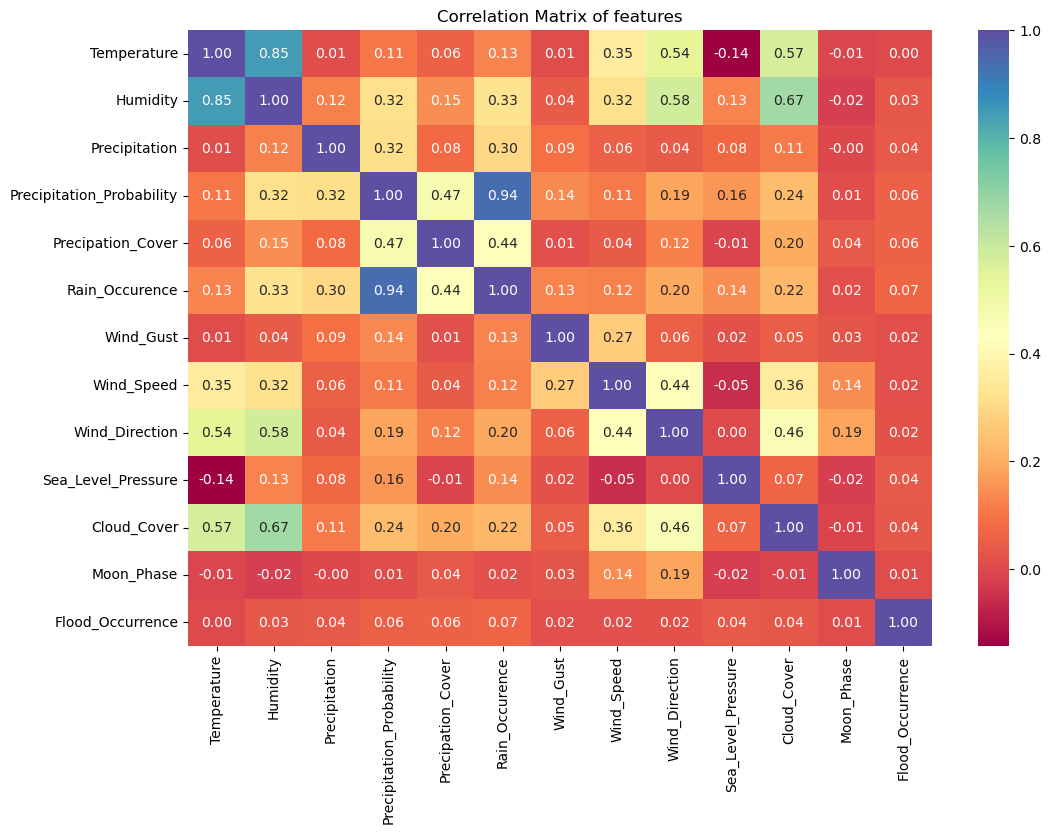

In [32]:
# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap='Spectral')
plt.title("Correlation Matrix of features")
plt.show()

In [33]:
weather_data = data.copy()

### Univariate and Bivariate Analysis

#### Feature Engineering

In [34]:
# Convert the 'datetime' column to datetime format
weather_data['Datetime'] = pd.to_datetime(weather_data['Datetime'], errors='coerce')

# Extract year, month, and day from 'datetime'
weather_data['Year'] = weather_data['Datetime'].dt.year
weather_data['Month'] =weather_data['Datetime'].dt.month
weather_data['Day'] = weather_data['Datetime'].dt.day

In [36]:
weather_data

,Datetime,Temperature,Humidity,Precipitation,Precipitation_Probability,Precipation_Cover,Rain_Occurence,Wind_Gust,Wind_Speed,Wind_Direction,Sea_Level_Pressure,Cloud_Cover,Moon_Phase,Flood_Occurrence,Year,Month,Day
0,2004-05-13,30.0,74.7,0.0,0.0,0.00,0,28.1,20.5,128.2,1011.9,90.0,0.80,0,2004,5,13
1,2004-05-14,26.3,97.5,0.0,0.0,0.00,0,28.1,20.5,280.4,1011.9,87.5,0.83,0,2004,5,14
2,2004-05-15,25.1,100.0,0.0,0.0,0.00,0,28.1,16.6,180.0,1011.9,90.0,0.87,0,2004,5,15
3,2004-05-16,22.9,95.8,0.0,0.0,0.00,0,28.1,11.2,350.0,1011.9,90.0,0.90,0,2004,5,16
4,2004-05-17,28.6,84.2,0.0,0.0,0.00,0,28.1,31.3,242.3,1011.9,90.0,0.94,0,2004,5,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7352,2024-06-29,27.1,87.1,12.0,100.0,4.17,1,28.4,22.3,241.1,1012.7,61.8,0.77,0,2024,6,29
7353,2024-06-30,27.8,86.2,3.0,100.0,4.17,1,29.5,25.9,236.9,1013.0,62.4,0.80,0,2024,6,30
7354,2024-07-01,27.9,84.6,6.9,100.0,50.00,1,24.1,22.3,249.6,1013.5,55.3,0.84,0,2024,7,1
7355,2024-07-02,26.9,85.9,13.6,100.0,62.50,1,31.0,22.7,235.8,1012.7,76.9,0.87,0,2024,7,2


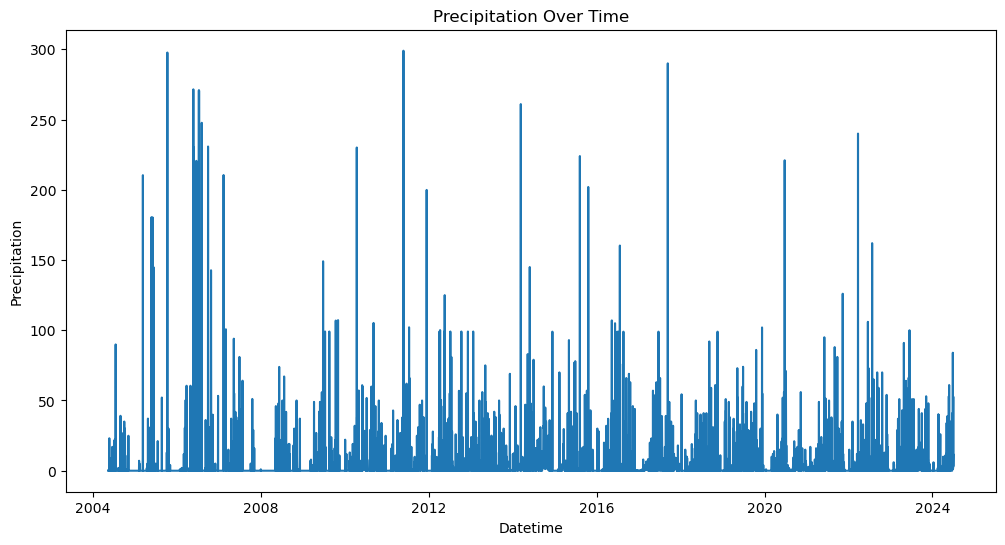

In [37]:
# Plot precipitation over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=weather_data, x='Datetime', y='Precipitation')
plt.title('Precipitation Over Time')
plt.show()

- High Variability: The precipitation levels exhibit significant variability over the years, with peaks indicating periods of heavy rainfall.

- Extreme Events: There are several spikes where precipitation values exceed 200 mm, suggesting extreme weather events.

- Seasonal Patterns: While the data shows variability, there appears to be a somewhat cyclical pattern, potentially indicating seasonal rainfall trends.

- Recent Trends: In the more recent years, the frequency and intensity of precipitation events seem to be sustained, though the highest peaks are not as extreme as some of the earlier years.

- This plot provides valuable insights into rainfall patterns, which can be crucial for flood prediction and understanding climate variability in the region.

In [38]:
flood = weather_data[weather_data['Flood_Occurrence'] == 1]
flood

,Datetime,Temperature,Humidity,Precipitation,Precipitation_Probability,Precipation_Cover,Rain_Occurence,Wind_Gust,Wind_Speed,Wind_Direction,Sea_Level_Pressure,Cloud_Cover,Moon_Phase,Flood_Occurrence,Year,Month,Day
92,2004-08-13,25.4,83.6,0.0,0.0,0.00,0,28.1,33.5,232.3,1014.9,90.0,0.92,1,2004,8,13
394,2005-06-11,23.8,95.1,145.0,100.0,8.33,1,28.1,18.4,279.5,1012.3,88.8,0.15,1,2005,6,11
395,2005-06-12,23.6,98.1,34.0,100.0,4.17,1,28.1,22.3,340.0,1011.9,93.3,0.18,1,2005,6,12
451,2005-08-07,25.1,83.5,0.0,0.0,0.00,0,28.1,29.5,247.3,1014.3,90.0,0.08,1,2005,8,7
2230,2010-06-21,27.3,85.9,17.1,100.0,100.00,1,28.1,18.7,224.1,1011.9,87.9,0.32,1,2010,6,21
2614,2011-07-10,24.2,95.0,1.0,100.0,4.17,1,25.9,29.5,229.9,1014.2,76.7,0.33,1,2011,7,10
2972,2012-07-02,23.8,96.1,55.1,100.0,8.33,1,55.4,0.0,0.0,1013.5,86.7,0.00,1,2012,7,2
3016,2012-08-15,25.2,78.8,0.0,0.0,0.00,0,31.7,0.0,0.0,1016.3,62.2,0.00,1,2012,8,15
3350,2013-07-15,25.6,91.6,0.1,100.0,4.17,1,24.1,14.8,230.2,1015.0,63.6,0.25,1,2013,7,15
4804,2017-07-08,24.6,95.5,18.1,100.0,8.33,1,25.9,14.8,247.9,1015.2,71.5,0.48,1,2017,7,8


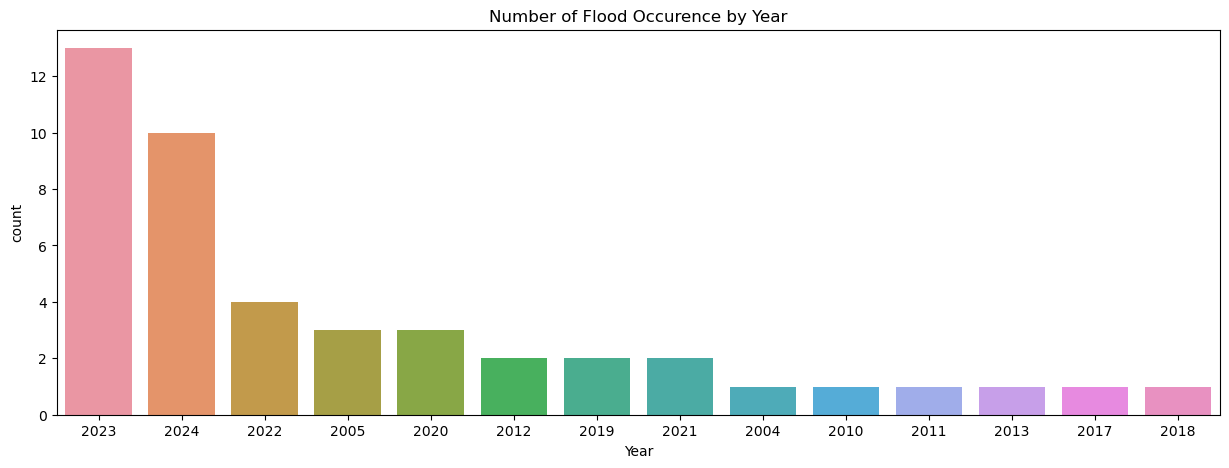

In [39]:
# show the trend of flood occurence by year
plt.figure(figsize=(15,5))
plt.title('Number of Flood Occurence by Year')
sns.countplot(x='Year', data=flood, order=flood['Year'].value_counts().index)
plt.show()

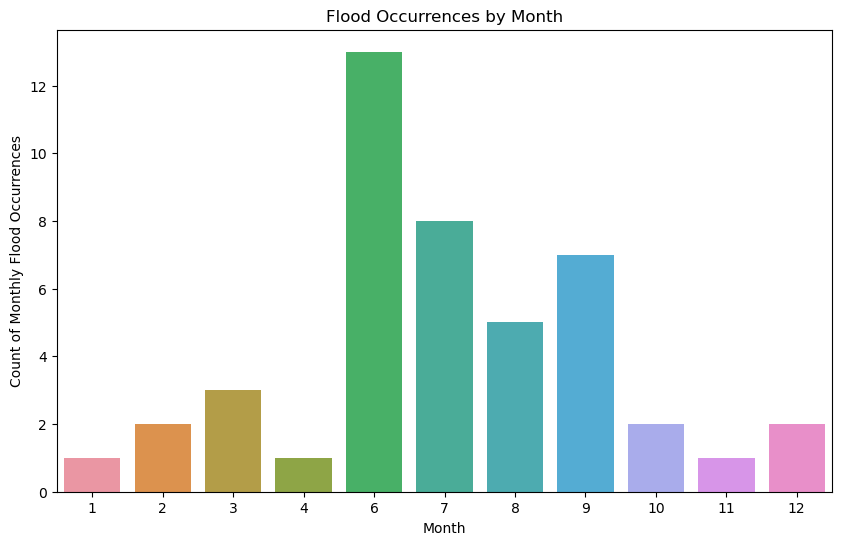

In [40]:
# 1. Visualization of months that floods are likely to occur
plt.figure(figsize=(10, 6))
sns.countplot(data=flood[flood['Flood_Occurrence'] == 1], x='Month')
plt.title('Flood Occurrences by Month')
plt.xlabel('Month')
plt.ylabel('Count of Monthly Flood Occurrences')
plt.show()

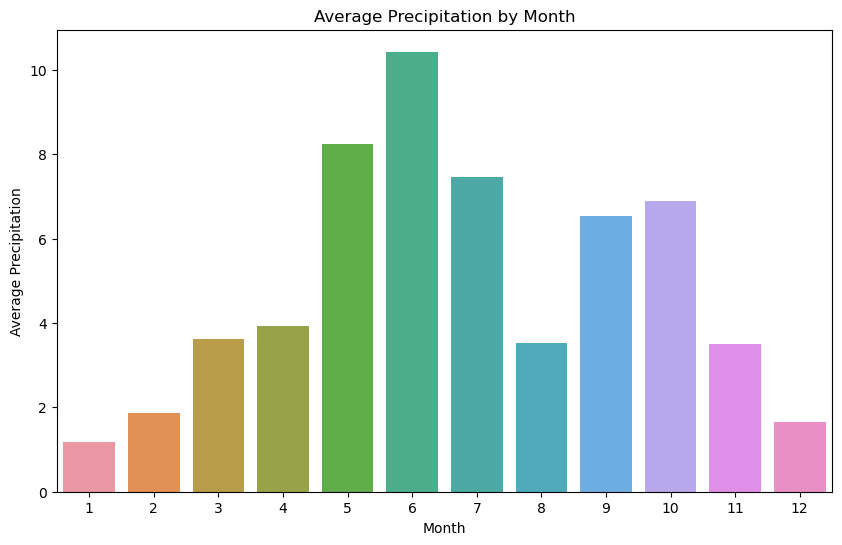

In [41]:
# 3. Average precipitation
average_precipitation = weather_data.groupby('Month')['Precipitation'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=average_precipitation, x='Month', y='Precipitation')
plt.title('Average Precipitation by Month')
plt.xlabel('Month')
plt.ylabel('Average Precipitation')
plt.show()

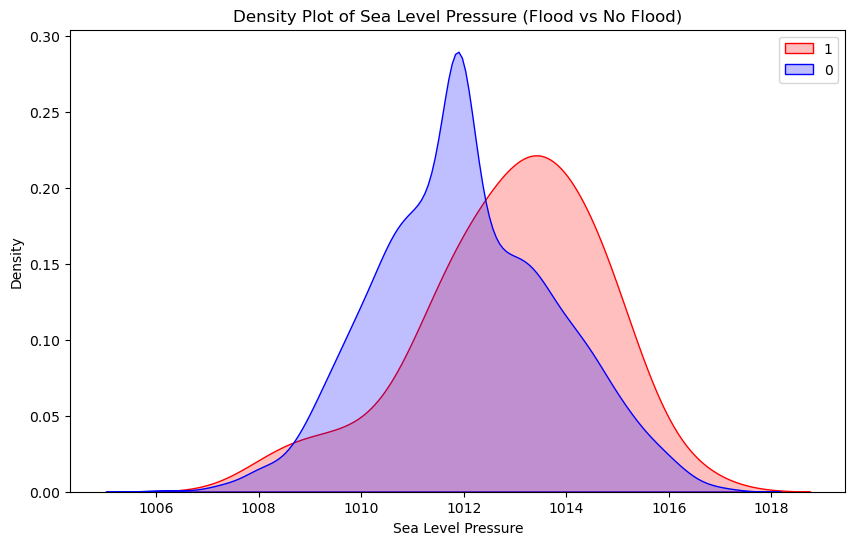

In [42]:
# Density Plots
plt.figure(figsize=(10, 6))
sns.kdeplot(data=weather_data[weather_data['Flood_Occurrence'] == 1]['Sea_Level_Pressure'], label=1, shade=True, color='r')
sns.kdeplot(data=weather_data[weather_data['Flood_Occurrence'] == 0]['Sea_Level_Pressure'], label=0, shade=True, color='b')
plt.title('Density Plot of Sea Level Pressure (Flood vs No Flood)')
plt.xlabel('Sea Level Pressure')
plt.ylabel('Density')
plt.legend()
plt.show()

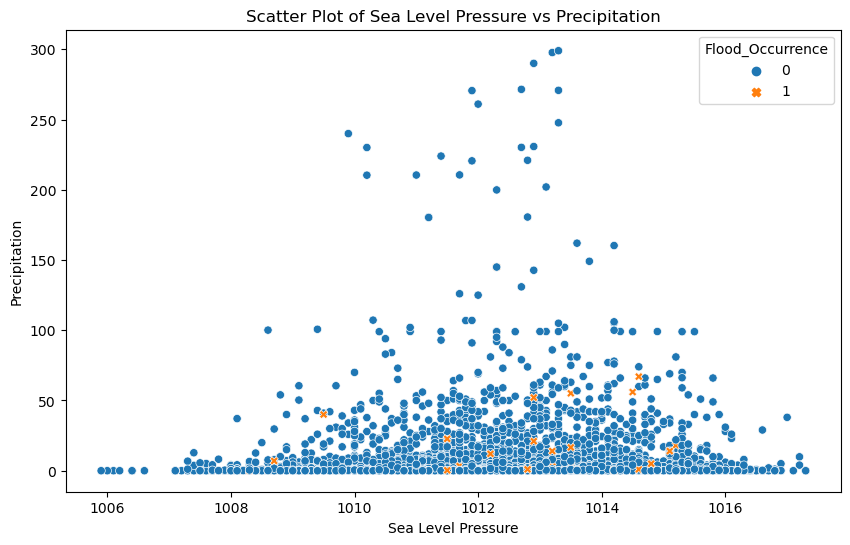

In [43]:
# Scatter Plots
plt.figure(figsize=(10, 6))
sns.scatterplot(data=weather_data, x='Sea_Level_Pressure', y='Precipitation', hue='Flood_Occurrence', style='Flood_Occurrence')
plt.title('Scatter Plot of Sea Level Pressure vs Precipitation')
plt.xlabel('Sea Level Pressure')
plt.ylabel('Precipitation')
plt.show()

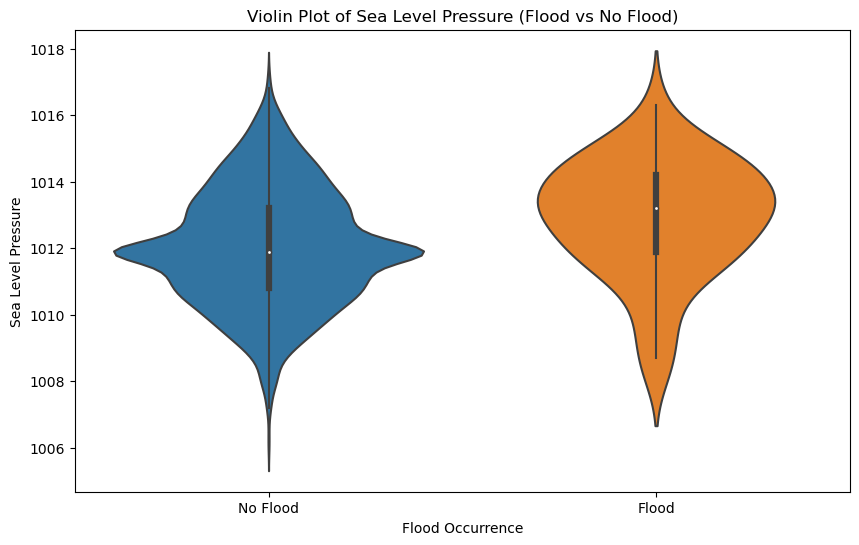

In [44]:
# Violin Plots
plt.figure(figsize=(10, 6))
sns.violinplot(data=weather_data, x='Flood_Occurrence', y='Sea_Level_Pressure')
plt.title('Violin Plot of Sea Level Pressure (Flood vs No Flood)')
plt.xlabel('Flood Occurrence')
plt.ylabel('Sea Level Pressure')
plt.xticks([0, 1], ['No Flood', 'Flood'])
plt.show()

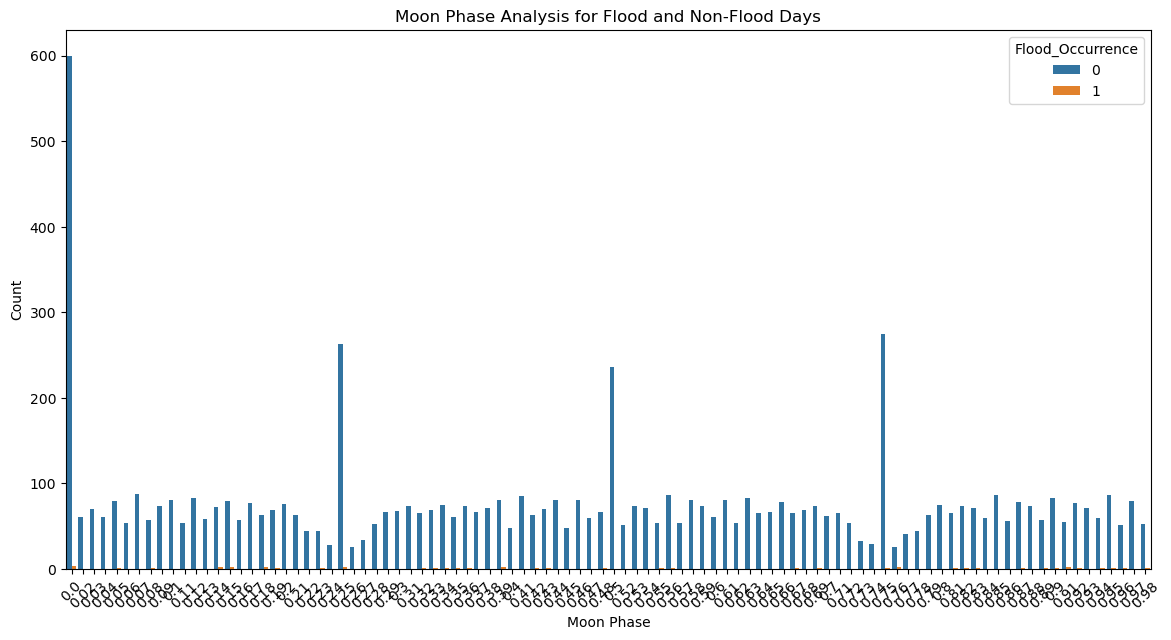

In [45]:
# 4. Visualizations for moon phase (flood vs no flood)
plt.figure(figsize=(14, 7))
sns.countplot(data=weather_data, x='Moon_Phase', hue='Flood_Occurrence')
plt.title('Moon Phase Analysis for Flood and Non-Flood Days')
plt.xlabel('Moon Phase')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

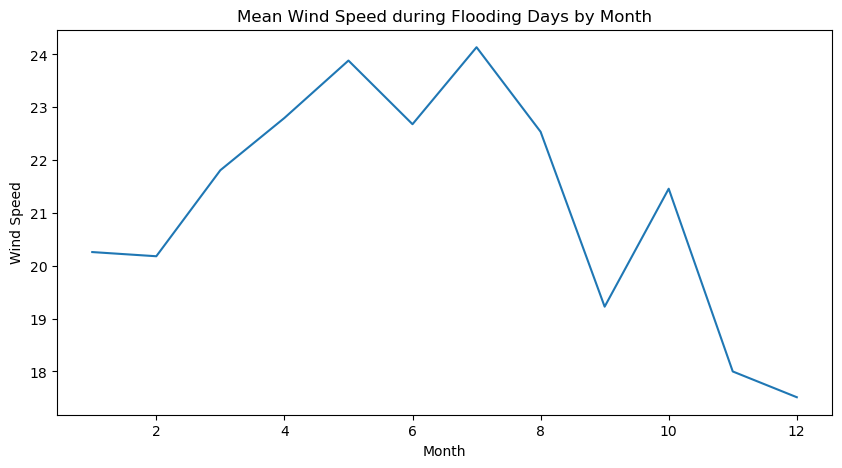

In [48]:
plt.figure(figsize=(10,5))
x = weather_data.groupby("Month")["Wind_Speed"].mean()
sns.lineplot(x=x.index, y=x.values)
plt.title('Mean Wind Speed during Flooding Days by Month')
plt.xlabel('Month')
plt.ylabel('Wind Speed')
plt.show()

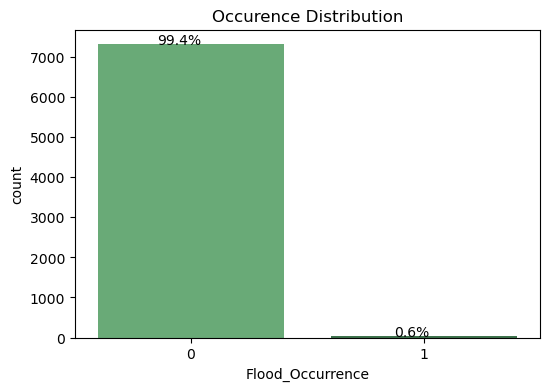

In [46]:
# Target distribution
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='Flood_Occurrence', data=weather_data, palette = 'Greens_d')
plt.title('Occurence Distribution')

# Calculate percentages and annotate
total = len(weather_data['Flood_Occurrence'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), ha='center')
    
# Saving the plot
plt.savefig('flood_occurence_distribution.png')
plt.show()

In [47]:
# Check for any columns related to flood occurrences
print(weather_data['Flood_Occurrence'].value_counts())

0    7312
1      45
Name: Flood_Occurrence, dtype: int64


Data is not balanced . This may cause the model not to perform well due to the influence of the more frequency class

#### Balancing the data

- Addressing class imbalance is crucial for developing unbiased and correct machine learning model prediction, especially  where both sensitivity and specificity are important.

-  We employed Random undersampling, a technique that involves reducing the majority class to the minority class).

In [49]:
weather_data.columns

Index(['Datetime', 'Temperature', 'Humidity', 'Precipitation',
       'Precipitation_Probability', 'Precipation_Cover', 'Rain_Occurence',
       'Wind_Gust', 'Wind_Speed', 'Wind_Direction', 'Sea_Level_Pressure',
       'Cloud_Cover', 'Moon_Phase', 'Flood_Occurrence', 'Year', 'Month',
       'Day'],
      dtype='object')

In [50]:
scaler = StandardScaler()

In [51]:
cols_to_scale = ['Temperature', 'Humidity', 'Precipitation',
       'Precipitation_Probability', 'Precipation_Cover',
       'Wind_Gust', 'Wind_Speed', 'Wind_Direction', 'Sea_Level_Pressure',
       'Cloud_Cover', 'Moon_Phase']

In [52]:
weather_data[cols_to_scale] = scaler.fit_transform(weather_data[cols_to_scale])

In [54]:
x_train = weather_data.drop(['Flood_Occurrence', 'Year', 'Day', 'Month', 'Datetime'], axis=1)
y_train = weather_data['Flood_Occurrence']

In [55]:
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler

In [56]:
Counter(y_train)

Counter({0: 7312, 1: 45})

In [57]:
undersampler = RandomUnderSampler()

In [58]:
x_train_res, y_train_res = undersampler.fit_resample(x_train, y_train)

In [59]:
x_train_res

,Temperature,Humidity,Precipitation,Precipitation_Probability,Precipation_Cover,Rain_Occurence,Wind_Gust,Wind_Speed,Wind_Direction,Sea_Level_Pressure,Cloud_Cover,Moon_Phase
2356,-0.161661,0.382869,-0.270881,-0.855020,-0.404329,0,-0.914680,0.946214,0.720318,-0.533714,-0.403468,0.402116
3735,-0.195397,0.666866,-0.161313,1.169564,2.427174,1,0.053616,0.359950,0.447838,1.755711,0.460790,-0.695966
3,-0.549618,0.902637,-0.270881,-0.855020,-0.404329,0,-0.097008,-0.774010,1.919984,-0.075829,1.566461,1.466922
4626,0.310634,0.131023,-0.270881,-0.855020,-0.404329,0,0.408658,0.082245,0.107239,-1.277777,-1.190474,0.002813
3037,-0.161661,0.516830,-0.270881,-0.855020,-0.404329,0,2.065520,-1.637979,-2.495193,2.099125,0.919474,-1.527846
...,...,...,...,...,...,...,...,...,...,...,...,...
7328,0.394973,0.340002,0.496100,1.169564,-0.089466,1,0.365622,0.082245,0.380980,0.668234,-0.104116,1.666573
7337,0.040751,0.538264,0.879590,1.169564,-0.089466,1,0.322587,-0.496305,0.392333,0.496527,-0.500033,-0.695966
7346,0.327502,0.345360,-0.216097,1.169564,-0.089466,1,-0.333703,0.082245,0.652198,0.439291,0.098670,0.302290
7350,0.057619,0.120306,0.386531,1.169564,-0.089466,1,0.053616,-0.218601,-0.161456,0.095878,-0.673851,0.768143


In [60]:
Counter(y_train_res)

Counter({0: 45, 1: 45})

### Building Models

#### Logistic Model

In [61]:
log_reg = LogisticRegression()

In [62]:
log_reg.fit(x_train_res, y_train_res)

LogisticRegression()

In [87]:
predy = log_reg.predict(x_train_res)

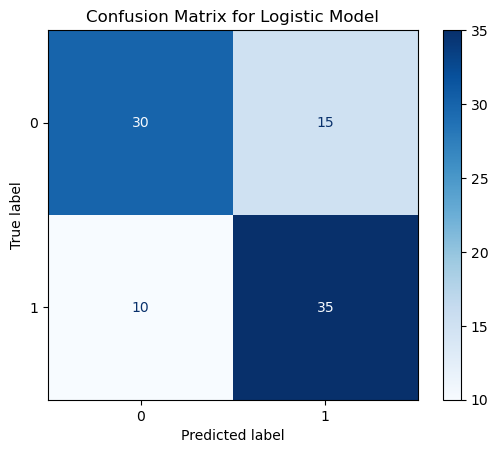

In [88]:
# Plot confusion matrix for the test set
cm = confusion_matrix(y_train_res, predy)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_reg.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Logistic Model")
plt.show()

In [65]:
print(classification_report(y_train_res, predy))

              precision    recall  f1-score   support

           0       0.75      0.67      0.71        45
           1       0.70      0.78      0.74        45

    accuracy                           0.72        90
   macro avg       0.72      0.72      0.72        90
weighted avg       0.72      0.72      0.72        90



#### Random Forest Model

In [68]:
rf = RandomForestClassifier()

In [69]:
rf.fit(x_train_res, y_train_res)

RandomForestClassifier()

In [89]:
predy = rf.predict(x_train_res)

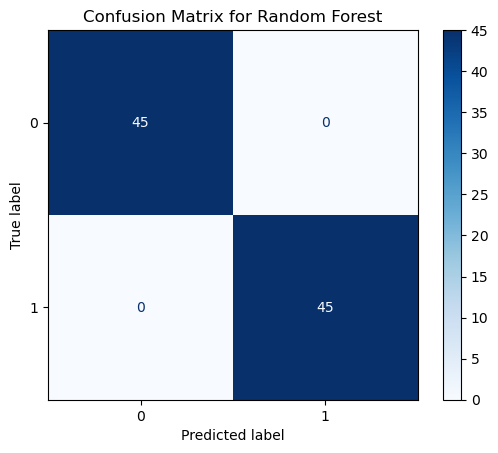

In [90]:
# Plot confusion matrix for the test set
cm = confusion_matrix(y_train_res, predy)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Random Forest")
plt.show()

In [72]:
print(classification_report(y_train_res, predy))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       1.00      1.00      1.00        45

    accuracy                           1.00        90
   macro avg       1.00      1.00      1.00        90
weighted avg       1.00      1.00      1.00        90



#### XGBOOST Model

In [91]:
xgb = XGBClassifier()

In [92]:
xgb.fit(x_train_res, y_train_res)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [93]:
predy = xgb.predict(x_train_res)

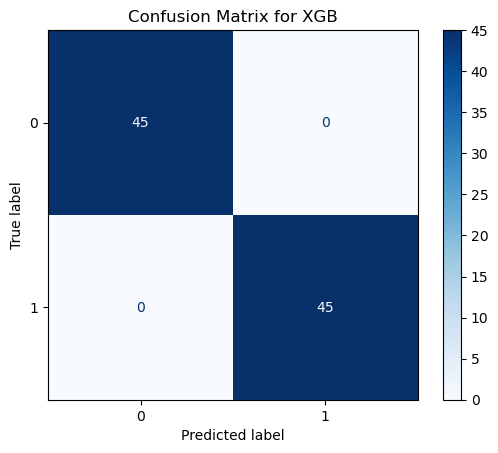

In [94]:
# Plot confusion matrix for the test set
cm = confusion_matrix(y_train_res, predy)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for XGB")
plt.show()

In [77]:
print(classification_report(y_train_res, predy))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       1.00      1.00      1.00        45

    accuracy                           1.00        90
   macro avg       1.00      1.00      1.00        90
weighted avg       1.00      1.00      1.00        90



#### Stacking Model

In [95]:
sc = StackingClassifier(estimators=[('lr', LogisticRegression()), ('rf', RandomForestClassifier())])

In [96]:
sc.fit(x_train_res, y_train_res)

StackingClassifier(estimators=[('lr', LogisticRegression()),
                               ('rf', RandomForestClassifier())])

In [97]:
predy = sc.predict(x_train_res)

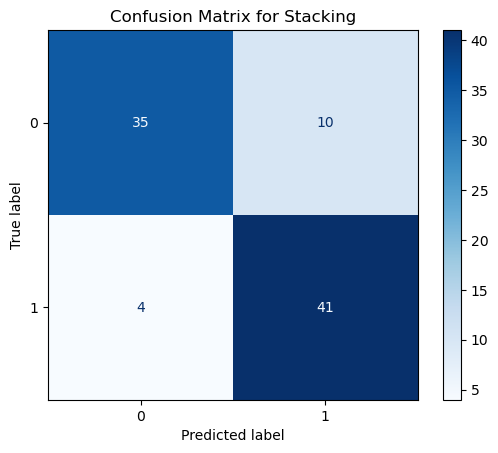

In [98]:
# Plot confusion matrix for the test set
cm = confusion_matrix(y_train_res, predy)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=sc.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Stacking")
plt.show()

In [99]:
print(classification_report(y_train_res, predy))

              precision    recall  f1-score   support

           0       0.90      0.78      0.83        45
           1       0.80      0.91      0.85        45

    accuracy                           0.84        90
   macro avg       0.85      0.84      0.84        90
weighted avg       0.85      0.84      0.84        90



### Predicting the next likely flood date
Ensure that the structure and features of the future weather data match those of the training data.

### Load and Format the Future Weather Data

In [203]:
predict_df = pd.read_csv('lagos_flood_predict_ 2024-07-04 to 2025-12-31-copy.csv')
predict_df.head()

,name,Datetime,tempmax,tempmin,Temperature,feelslikemax,feelslikemin,feelslike,dew,Humidity,Precipitation,Precipitation_Probability,Precipation_Cover,Rain_Occurence,Wind_Gust,Wind_Speed,Wind_Direction,Sea_Level_Pressure,Cloud_Cover,Visibility,solarradiation,solarenergy,uvindex,severerisk,sunrise,sunset,Moon_Phase,Conditions,Description,icon,stations
0,lagos,7/4/2024,30.0,24.0,26.8,36.1,24.0,29.4,24.3,86.7,7.4,100.0,58.33,1,18.6,13.9,229.1,1014.0,42.8,5.2,200.2,17.3,6,10,2024-07-04T06:36:28,2024-07-04T19:05:34,0.95,"Rain, Partially cloudy",Partly cloudy throughout the day with a chance...,rain,DNMM
1,lagos,7/5/2024,30.0,24.0,27.5,36.1,24.0,30.6,24.4,83.4,3.8,100.0,45.83,1,15.2,12.8,243.3,1014.3,46.3,6.4,234.3,20.1,8,30,2024-07-05T06:36:42,2024-07-05T19:05:41,0.00,"Rain, Partially cloudy",Partly cloudy throughout the day with a chance...,rain,"DNMM,remote"
2,lagos,7/6/2024,27.3,25.0,26.7,30.1,25.0,28.1,23.2,81.5,7.0,100.0,75.00,1,19.9,17.0,225.0,1012.8,74.3,12.8,261.4,22.6,9,30,2024-07-06T06:36:55,2024-07-06T19:05:48,0.02,"Rain, Partially cloudy",Partly cloudy throughout the day with storms p...,rain,DNMM
3,lagos,7/7/2024,27.3,25.8,26.5,30.0,25.8,27.1,23.0,81.2,10.6,96.8,66.67,1,20.1,17.9,230.0,1012.9,99.7,12.5,256.0,21.9,9,30,2024-07-07T06:37:08,2024-07-07T19:05:54,0.05,"Rain, Overcast",Cloudy skies throughout the day with storms po...,rain,NaN
4,lagos,7/8/2024,26.4,25.0,25.9,26.4,25.0,25.9,22.9,83.7,15.9,90.3,91.67,1,19.2,17.7,244.7,1012.6,98.5,10.2,83.7,7.2,3,10,2024-07-08T06:37:21,2024-07-08T19:05:59,0.08,"Rain, Overcast",Cloudy skies throughout the day with a chance ...,rain,NaN


In [211]:
predict_flood = predict_df.filter(['Temperature', 'Humidity', 'Precipitation',
       'Precipitation_Probability', 'Precipation_Cover',
       'Wind_Gust', 'Wind_Speed', 'Wind_Direction', 'Sea_Level_Pressure',
       'Cloud_Cover', 'Moon_Phase'])

In [212]:
predict_flood

,Temperature,Humidity,Precipitation,Precipitation_Probability,Precipation_Cover,Wind_Gust,Wind_Speed,Wind_Direction,Sea_Level_Pressure,Cloud_Cover,Moon_Phase
0,26.8,86.7,7.4,100.0,58.33,18.6,13.9,229.1,1014.0,42.8,0.95
1,27.5,83.4,3.8,100.0,45.83,15.2,12.8,243.3,1014.3,46.3,0.00
2,26.7,81.5,7.0,100.0,75.00,19.9,17.0,225.0,1012.8,74.3,0.02
3,26.5,81.2,10.6,96.8,66.67,20.1,17.9,230.0,1012.9,99.7,0.05
4,25.9,83.7,15.9,90.3,91.67,19.2,17.7,244.7,1012.6,98.5,0.08
5,25.9,82.9,18.5,87.1,83.33,21.0,18.8,247.6,1012.2,95.3,0.11
6,25.3,86.3,26.3,80.6,87.50,22.6,19.0,239.0,1013.1,92.7,0.15
7,24.8,87.8,31.3,71.0,33.33,21.5,16.6,253.2,1014.7,99.9,0.18
8,25.2,84.3,12.0,41.9,29.17,17.3,14.7,254.9,1015.6,92.6,0.21
9,26.0,78.6,2.5,45.2,25.00,19.9,18.8,238.1,1015.5,97.4,0.25


In [213]:
# feature scaling
cols_to_scale = ['Temperature', 'Humidity', 'Precipitation',
       'Precipitation_Probability', 'Precipation_Cover',
       'Wind_Gust', 'Wind_Speed', 'Wind_Direction', 'Sea_Level_Pressure',
       'Cloud_Cover', 'Moon_Phase']

In [214]:
# Print columns to check for discrepancies
print("Columns in predict_flood:", predict_flood.columns)
print("Columns expected for scaling:", cols_to_scale)


Columns in predict_flood: Index(['Temperature', 'Humidity', 'Precipitation', 'Precipitation_Probability',
       'Precipation_Cover', 'Wind_Gust', 'Wind_Speed', 'Wind_Direction',
       'Sea_Level_Pressure', 'Cloud_Cover', 'Moon_Phase'],
      dtype='object')
Columns expected for scaling: ['Temperature', 'Humidity', 'Precipitation', 'Precipitation_Probability', 'Precipation_Cover', 'Wind_Gust', 'Wind_Speed', 'Wind_Direction', 'Sea_Level_Pressure', 'Cloud_Cover', 'Moon_Phase']


In [ ]:
# Predict Flooding Date
flood_dates = rf.predict(predict_flood)
print(flood_dates)


In [189]:
scale = ['Temperature', 'Humidity', 'Wind_Gust', 'Wind_Speed', 'Wind_Direction', 'Sea_Level_Pressure']

In [190]:
predict_flood[scale] = scaler.fit_transform(predict_flood[scale])

In [191]:
predict_flood.head()

,Temperature,Rain_Occurence,Precipitation,Precipitation_Probability,Precipation_Cover,Wind_Gust,Wind_Speed,Wind_Direction,Humidity,Sea_Level_Pressure,Moon_Phase
0,1.332112,1.0,7.4,100.0,58.33,-0.686736,-1.744535,-0.883880,1.373261,-0.422900,9.500000e-01
1,2.472553,1.0,3.8,100.0,45.83,-2.490978,-2.255064,0.714387,0.628914,-0.193454,5.877651e-17
2,1.169192,1.0,7.0,100.0,75.00,0.003122,-0.305771,-1.345351,0.200350,-1.340684,2.000000e-02
3,0.843351,1.0,10.6,96.8,66.67,0.109253,0.111934,-0.782581,0.132682,-1.264202,5.000000e-02
4,-0.134170,1.0,15.9,90.3,91.67,-0.368340,0.019111,0.871962,0.696582,-1.493648,8.000000e-02


In [192]:
from sklearn.preprocessing import LabelEncoder

In [193]:
# Import necessary libraries
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
encoder = LabelEncoder()

# Fit the encoder and transform the 'Rain_Occurence' column
predict_flood['Rain_Occurence'] = encoder.fit_transform(predict_flood['Rain_Occurence'])

# Display the DataFrame after encoding to confirm
print(predict_flood.head())


   Temperature  Rain_Occurence  Precipitation  Precipitation_Probability  \
0     1.332112               0            7.4                      100.0   
1     2.472553               0            3.8                      100.0   
2     1.169192               0            7.0                      100.0   
3     0.843351               0           10.6                       96.8   
4    -0.134170               0           15.9                       90.3   

   Precipation_Cover  Wind_Gust  Wind_Speed  Wind_Direction  Humidity  \
0              58.33  -0.686736   -1.744535       -0.883880  1.373261   
1              45.83  -2.490978   -2.255064        0.714387  0.628914   
2              75.00   0.003122   -0.305771       -1.345351  0.200350   
3              66.67   0.109253    0.111934       -0.782581  0.132682   
4              91.67  -0.368340    0.019111        0.871962  0.696582   

   Sea_Level_Pressure    Moon_Phase  
0           -0.422900  9.500000e-01  
1           -0.193454  5.877

In [194]:
training_features = ['Temperature', 'Precipitation', 'Precipitation_Probability', 'Precipation_Cover', 
                     'Rain_Occurence', 'Wind_Gust', 'Wind_Speed', 'Wind_Direction', 
                     'Humidity', 'Sea_Level_Pressure','Cloud_Cover', 'Moon_Phase']


In [216]:
print(future_predictions)

### Visualization
1. Import Necessary Libraries

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

2. Prepare the Data for Visualization - Combine the future weather data with the predictions:

In [ ]:
# Add predictions to the future weather data
future_weather_data_df['flood_prediction'] = future_predictions

# Display the combined DataFrame
print(future_weather_data_df)

            name   datetime  tempmax  tempmin  temp  feelslikemax  \
0  lagos,Nigeria   7/5/2024     30.0     24.0  27.4          36.1   
1  lagos,Nigeria   7/6/2024     27.3     26.5  26.8          30.0   
2  lagos,Nigeria   7/7/2024     26.9     26.0  26.4          29.3   
3  lagos,Nigeria   7/8/2024     26.3     25.2  25.7          26.3   
4  lagos,Nigeria   7/9/2024     26.9     24.8  25.9          29.3   
5  lagos,Nigeria  7/10/2024     25.9     25.1  25.5          25.9   
6  lagos,Nigeria  7/11/2024     25.6     23.8  24.6          25.6   

   feelslikemin  feelslike   dew  humidity  ...  uvindex  severerisk  \
0          24.0       30.3  24.3      83.1  ...        8          30   
1          26.5       27.8  23.1      80.1  ...        8          30   
2          26.0       26.9  22.8      80.6  ...        7          10   
3          25.2       25.7  22.9      84.4  ...        3          10   
4          24.8       26.2  22.8      83.0  ...        8          10   
5          25.1

3. Plot the Predictions- Create a time series plot to show the predicted flood events over the forecast period.

In [ ]:
# Set the datetime column as the index
future_weather_data_df['datetime'] = pd.to_datetime(future_weather_data_df['datetime'])
future_weather_data_df.set_index('datetime', inplace=True)

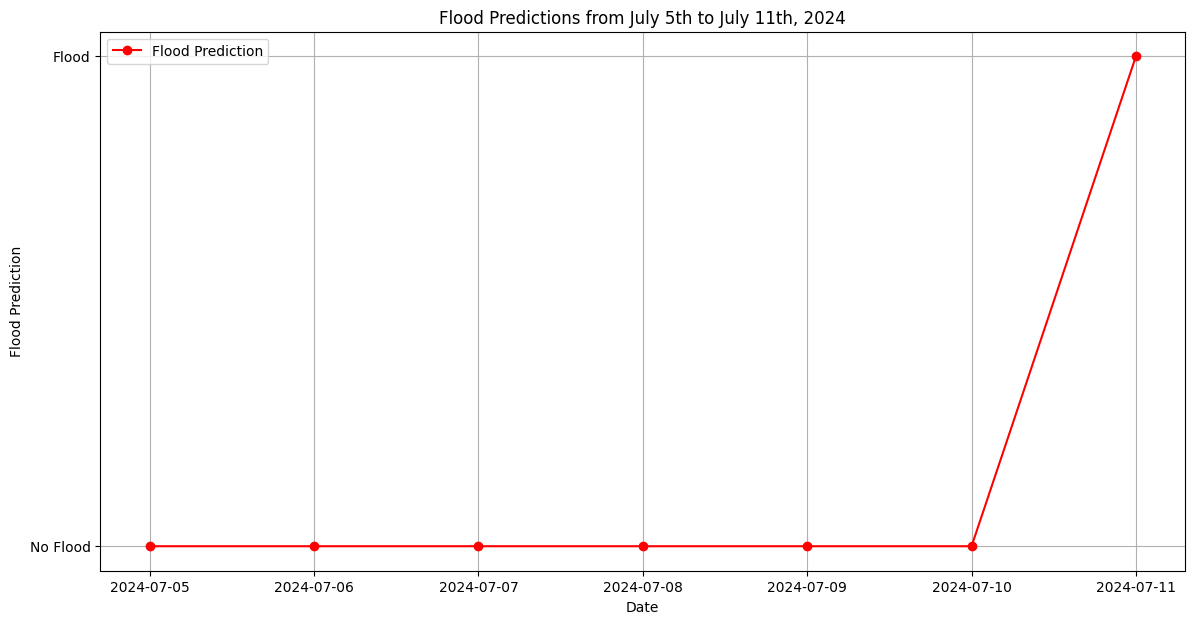

In [ ]:
# Plot the data
plt.figure(figsize=(14, 7))
plt.plot(future_weather_data_df.index, future_weather_data_df['flood_prediction'], marker='o', linestyle='-', color='r', label='Flood Prediction')
plt.title('Flood Predictions from July 5th to July 11th, 2024')
plt.xlabel('Date')
plt.ylabel('Flood Prediction')
plt.yticks([0, 1], ['No Flood', 'Flood'])
plt.legend()
plt.grid(True)
plt.show()